## Simulation set-up

In [162]:
import matplotlib
# matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    
    # list of all degrees
    x = list(dict(g.degree).values())
    
    # plot linear-linear degree distribution
    subplot(3, 1, 1)
    subplots_adjust(top = 10, bottom = 8)
    cla()
    hist(x, density=True, stacked=True)
    xlabel('Degree')
    ylabel('Frequency')
    
    # plot log-linear degree distribution
    subplot(3, 1, 2)
    subplots_adjust(top = 10, bottom = 8)
    cla()
    
    hist(x, density=True, stacked=True)
    xlabel('Degree')
    ylabel('Frequency')
    yscale('log')
    
    # plot log-log degree distribution
    subplot(3, 1, 3)
    cla()
    hista, bins = np.histogram(x, bins=10, density=True)
    logs = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    hist(x, bins=list(logs), density = True, stacked=True)
    xlabel('Degree')
    ylabel('Frequency')
    yscale('log')
    xscale('log')
    
    show()

# modify this function to make the growth of the network "preferential"
# the input nds is all the nodes in the network
# the output i indicates the node that the new node would connect to

# randomly select m nodes
def no_pref_select(m):
    global g
    return list(np.random.choice(list(g.nodes), m, replace=False))

# update rule with no preference
def update_no_pref():
    global g
    g.count += 1
    if g.count % 1 == 0: # network growth once in every step
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        chosen = no_pref_select(m)
        for c in chosen:
            g.add_edge(newcomer, c)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

# select m nodes with probability based on degrees
def pref_select(a, m):
    global g
    # get all degrees
    degrees = list(dict(g.degree).values())
    if len(degrees) == 1:
        return [0]
    
    sum_degree = 0
    all_deg = []
    probs = []
    
    # get sum of all degrees*alpha
    for i, d in enumerate(degrees):
        sum_degree += d**a
        
    # get probabilities of all nodes
    for i, d in enumerate(degrees):
        all_deg.append(int(d**a / sum_degree*1000))
    
    # add nodes to a new list with occurrences based on their probabilities
    for i, d in enumerate(all_deg):
        for j in range(d):
            probs.append(i)
    
    # get m nodes
    chosen = []
    for i in range(m):
        # get a random node
        node = np.random.choice(probs)
        chosen.append(node)
        # delete chosen nodes
        probs = list(filter((node).__ne__, probs))
    return chosen

def update_pref():
    global g
    g.count += 1
    if g.count % 1 == 0: # network growth once in every step
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        chosen = pref_select(a, m)
        for c in chosen:
            g.add_edge(newcomer, c)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    
# simulate the network
def main_sim_no_pref(m0, m, t):
    start = time.time()
    initialize()

    for i in tqdm(range(t)):
        update_no_pref()
    plt.figure()
    observe()
    
    # get mean, max degree
    print('Mean degree: ', np.mean(list(dict(g.degree).values())))
    print('Max degree: ', np.max(list(dict(g.degree).values())))
    print('Runtime: ', time.time()-start)
    
    return list(dict(g.degree).values())

# simulate the network
def main_sim_pref(m0, m, a, t):
    start = time.time()
    initialize()
    
    for i in tqdm(range(t)):
        update_pref()
    plt.figure()
    observe()
    
    # get mean, max degree
    print('Mean degree: ', np.mean(list(dict(g.degree).values())))
    print('Max degree: ', np.max(list(dict(g.degree).values())))
    print('Runtime: ', time.time()-start)
    
    return list(dict(g.degree).values())

# import pycxsimulator
# pycxsimulator.GUI().start(func=[initialize, observe, update])

## Run no preference simulation

100%|██████████| 1000/1000 [01:00<00:00, 16.61it/s]


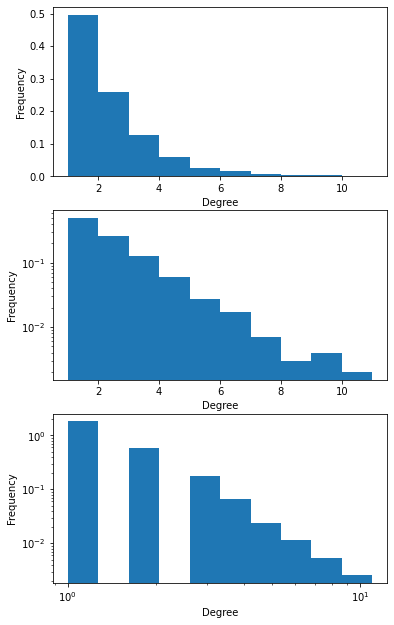

Mean degree:  1.998001998001998
Max degree:  11
Runtime:  61.24015188217163


In [136]:
m0 = 1
m = 1
t = 1000
no_pref_d = main_sim_no_pref(m0, m, t)

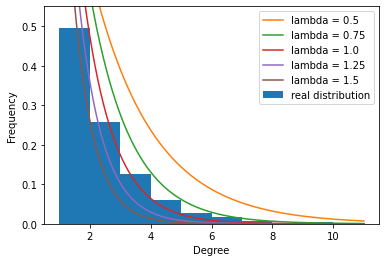

In [251]:
# Test parameters for exponential distribution

def exponential(theta, l, degrees):
    plt.plot(degrees, theta*l*np.exp(-l*degrees), label = f'lambda = {l}')
    
lambda_list = np.linspace(0.5, 1.5, 5)
theta = 2

# plot actual distribution
plt.hist(no_pref_d, density = True, stacked = True, label = 'real distribution')

# plot for different lambdas
for l in lambda_list:
    exponential(a, l, np.linspace(np.min(no_pref_d), np.max(no_pref_d), len((no_pref_d))))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.ylim(0, 0.55)
plt.legend()
plt.show()

## Run simulation for preference network, alpha = 1

100%|██████████| 1000/1000 [01:02<00:00, 15.96it/s]


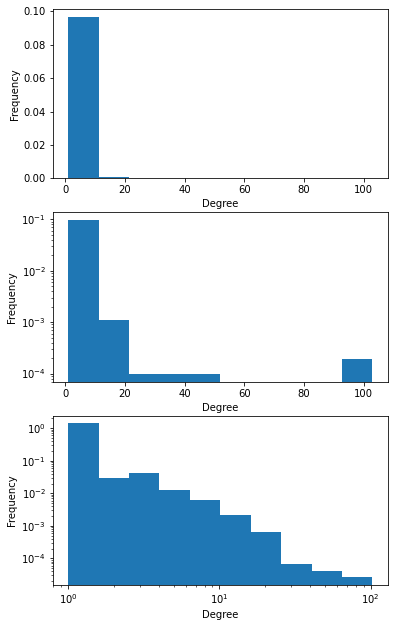

Mean degree:  1.998001998001998
Max degree:  103
Runtime:  64.17493176460266


In [137]:
m0 = 1
m = 1
a = 1
t = 1000
pref_d = main_sim_pref(m0, m, a, t)

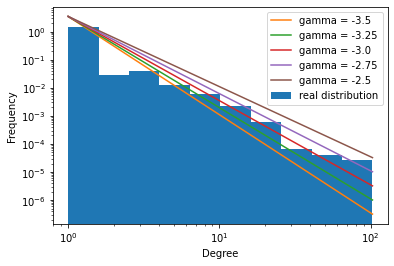

In [249]:
# Test parameters for power-law distribution

def powerlaw(beta, gamma, degrees):
    plt.plot(degrees, beta*degrees**gamma, label = f'gamma = {gamma}')
    
gamma_list = np.linspace(-3.5, -2.5, 5)

beta = 3.5

# plot real distribution
hista, bins = np.histogram(pref_d, bins=10, density=True)
logs = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(pref_d, bins=list(logs), density = True, stacked=True, label='real distribution')
plt.xscale('log')
plt.yscale('log')

# plot different gamma values
for g in gamma_list:
    powerlaw(beta, g, np.linspace(np.min(pref_d), np.max(pref_d), len((pref_d))))
    
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Run simulation with different values of alpha

### Simulate when alpha = 2

100%|██████████| 1000/1000 [00:53<00:00, 18.60it/s]


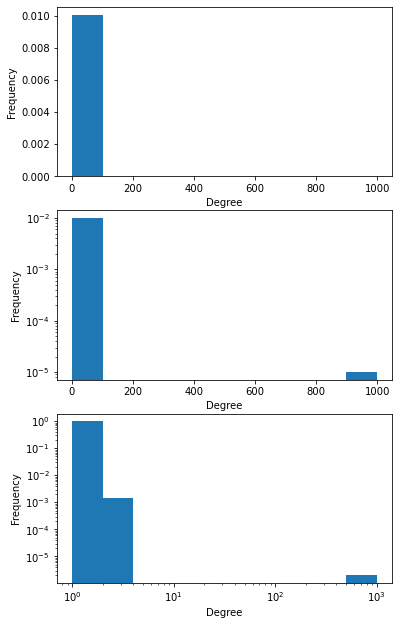

Mean degree:  1.998001998001998
Max degree:  997
Runtime:  54.97740387916565


In [138]:
m0 = 1
m = 1
a = 2
t = 1000
pref_d_2 = main_sim_pref(m0, m, a, t)

### Simulate when alpha = 0.5

100%|██████████| 1000/1000 [01:04<00:00, 15.57it/s]


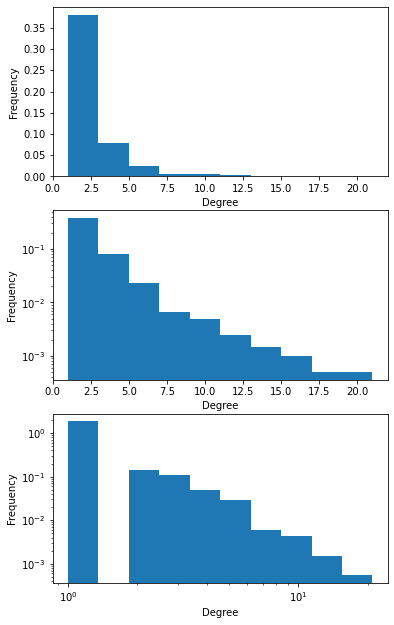

Mean degree:  1.998001998001998
Max degree:  21
Runtime:  65.60497999191284


In [131]:
m0 = 1
m = 1
a = 0.5
t = 1000
pref_d_3 = main_sim_pref(m0, m, a, t)

### Effect of alpha on nodes' importances

In [252]:
def test(a, ls):
    s = 0
    for l in ls:
        s += l**a
    f = {}
    for i, l in enumerate(ls):
        f[i+1] = float(format(l**a / s,".4f"))
    return f

In [254]:
ls = list(range(1, 6))
print('alpha = 0.5')
print(test(a=0.5, ls=ls))
print('alpha = 1')
print(test(a=1, ls=ls))
print('alpha = 2')
print(test(a=2, ls=ls))

alpha = 0.5
{1: 0.1193, 2: 0.1687, 3: 0.2066, 4: 0.2386, 5: 0.2668}
alpha = 1
{1: 0.0667, 2: 0.1333, 3: 0.2, 4: 0.2667, 5: 0.3333}
alpha = 2
{1: 0.0182, 2: 0.0727, 3: 0.1636, 4: 0.2909, 5: 0.4545}
